In [2]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using PlotlyJS
using StatsBase

### Comparison between exact Leverage Scores (LSs) and empirical LSs

magnetic Laplacian

In [16]:
n = 500
p = 0.2
eta = 0.1
cst = 40

rng = Random.default_rng()
type = "MUN"
meta_g = gen_graph_mun(rng, n, p, eta)
B = magnetic_incidence_matrix(meta_g);

q=0

In [17]:
q = 0

name = "JL-LS"*type*"_n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
lev = leverage_score(B, q)
JL_lev = JL_lev_score_estimates(B, q; cst);

rel_diff = (lev-JL_lev)./lev;
println("mean: ", mean(rel_diff), " std: ", std(rel_diff))

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)




k = 407 vs nb edges= 25220
 
mean: 0.002869888744030441 std: 0.05529450844936239


"JL-LSn500p0.2eta0.1q0"

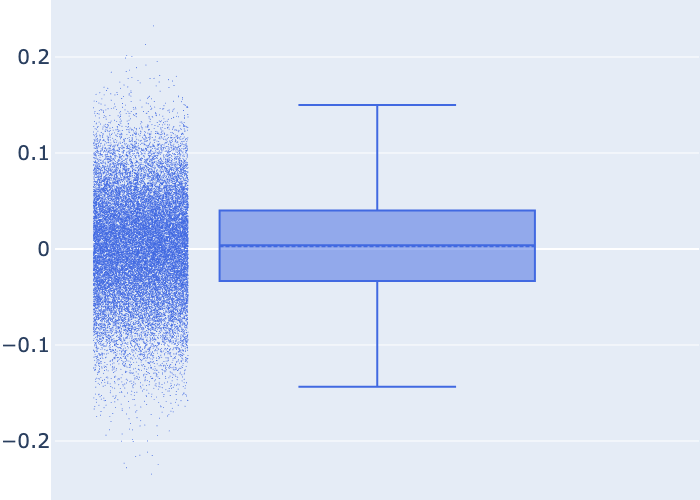

In [18]:
trace = box(y=rel_diff,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=1),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)


layout = Layout(
    autosize=false,
    width=500,
    height=500,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
)
PlotlyJS.plot(trace,layout)

In [19]:
plt = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(plt,"figures/"*name*".pdf")

"figures/JL-LSn500p0.2eta0.1q0.pdf"

q=1

In [20]:
q = 1


lev = leverage_score(B, q)
JL_lev = JL_lev_score_estimates(B, q; cst);

rel_diff = (lev-JL_lev)./lev;
println("mean: ", mean(rel_diff), " std: ", std(rel_diff))

name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

trace = box(y=rel_diff,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=1),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=500,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
)
PlotlyJS.plot(trace,layout)

plt = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(plt,"figures/"*name*".pdf")

k = 408 vs nb edges= 25220
 
mean: 0.0029292575488378014 std: 0.056266446093507345


"figures/JL-LSn500p0.2eta0.1q1.pdf"

In [21]:
name = "JL-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

plt = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(plt,"figures/"*name*".pdf")

"figures/JL-LSn500p0.2eta0.1q1.pdf"

Empirical estimates

In [22]:
nb_samples = Int(1e5)

q = 0.
name = "emp-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*"nb_samples"*string(nb_samples)

lev = leverage_score(B, q)
emp_lev = emp_leverage_score(rng, meta_g, q, nb_samples)

rel_diff = vec((lev-emp_lev)./lev);
println("mean: ", mean(rel_diff), " std: ", std(rel_diff))


mean: 6.4958650022111406e-6 std: 0.022149850253948986


"figures/emp_LSn500p0.2eta0.1q0.0.pdf"

In [23]:
trace = box(y=rel_diff,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=1),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=500,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
)
PlotlyJS.plot(trace,layout)

name = "emp_LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

plt = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(plt,"figures/"*name*".pdf")

"figures/emp_LSn500p0.2eta0.1q0.0.pdf"

In [24]:
nb_samples = Int(1e5)

q = 1
name = "emp-LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*"nb_samples"*string(nb_samples)

lev = leverage_score(B, q)
emp_lev = emp_leverage_score(rng, meta_g, q, nb_samples)

rel_diff = vec((lev-emp_lev)./lev);
println("mean: ", mean(rel_diff), " std: ", std(rel_diff))


trace = box(y=rel_diff,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=1),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=500,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
)
PlotlyJS.plot(trace,layout)

name = "emp_LS"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

plt = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(plt,"figures/"*name*".pdf")

mean: -1.8569088534199233e-5 std: 0.022392667335025467


"figures/emp_LSn500p0.2eta0.1q1.pdf"